In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data
from sklearn.model_selection import train_test_split

from utils import clear_start
from autoencoder import AutoEncoder
from utils import (
    construct_label, 
    clear_start,
)
%matplotlib inline

In [2]:
def visualize_encodings2D(ae, train_x, train_y=None, test_x=None, test_y=None, alpha=0.3):
    train_x = np.array(train_x)
    train_encodings = ae.fit_transform(train_x)
    if train_y is not None:
        plt.scatter(*train_encodings.T, c=train_y, alpha=alpha)
    if test_x is not None:
        test_x = np.array(test_x)
        test_encodings = ae.fit_transform(test_x)
        if test_y is not None:
            plt.scatter(*test_encodings.T, c=test_y)
        else:
            plt.scatter(*test_encodings.T)
    else:
        if train_y is not None:
            plt.scatter(*train_encodings.T, c=train_y)
        else:
            plt.scatter(*train_encodings.T)
    plt.show()

In [3]:
random_state=17

In [4]:
X, y = data.load_digits(return_X_y=True)

In [5]:
X.shape, y.shape

((1797, 64), (1797,))

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [7]:
ae = AutoEncoder(structure=[64, 16, 2, 16, 64], encoding_layer_index=2,
                 verbose=True, random_state=random_state, cpu_only=False)

In [8]:
ae.fit(train_x, seperate_validation=False, use_batch_norm=True, batch_norm_train=True, 
       early_stopping_epochs=3, dropout_keep_rate=0.5, 
       n_epochs=100, batch_size=32, learning_rate=0.01, beta=0.01)
# hyperparameters can really affect the result
# don't be disappointed if it doesn't work from the first try

seed is fixed to 17
epoch 0 started
0 epoch mean loss: 59.71229995380748
epoch 1 started
1 epoch mean loss: 33.877355965701014
epoch 2 started
2 epoch mean loss: 22.12391406839544
epoch 3 started
3 epoch mean loss: 19.22422643141313
epoch 4 started
4 epoch mean loss: 17.946961012753572
epoch 5 started
5 epoch mean loss: 17.064093698154796
epoch 6 started
6 epoch mean loss: 16.393264120275322
epoch 7 started
7 epoch mean loss: 15.841947078704834
epoch 8 started
8 epoch mean loss: 15.443230238827793
epoch 9 started
9 epoch mean loss: 15.166708772832697
epoch 10 started
10 epoch mean loss: 14.99165042963895
epoch 11 started
11 epoch mean loss: 14.727918321436102
epoch 12 started
12 epoch mean loss: 14.64457327669317
epoch 13 started
13 epoch mean loss: 14.527412111108953
epoch 14 started
14 epoch mean loss: 14.412068150260232
epoch 15 started
15 epoch mean loss: 14.350422490726817
epoch 16 started
16 epoch mean loss: 14.273217483000321
epoch 17 started
17 epoch mean loss: 14.1755420077930

In [9]:
ae.score(train_x)

28.09211462200843

In [10]:
ae.score(test_x)

28.23265762291141

In [11]:
ae.best_loss

13.56466707316312

The inference took 0.028037309646606445 seconds


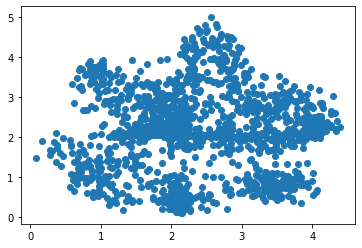

In [12]:
visualize_encodings2D(ae, train_x)

The inference took 0.0012178421020507812 seconds


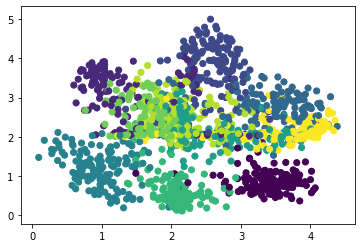

In [13]:
visualize_encodings2D(ae, train_x, train_y)

The inference took 0.0011975765228271484 seconds
The inference took 0.0008554458618164062 seconds


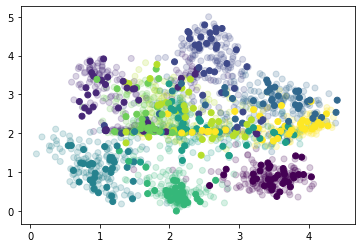

In [14]:
visualize_encodings2D(ae, train_x, train_y, test_x, test_y, alpha=0.2)

In [15]:
ae.save_model('./ae.pb')

In [16]:
ae2 = AutoEncoder()
ae2 = ae2.load_model('./ae.pb') # for use only

In [17]:
encodings = ae2.fit_transform(train_x)

In [18]:
encodings.shape

(1437, 2)

In [19]:
encoded_decoded = ae2.predict(train_x)

In [20]:
encoded_decoded.shape

(1437, 64)

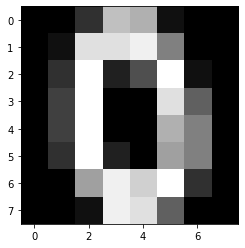

In [21]:
index = 8
plt.imshow(test_x[index].reshape((8,8)), cmap='gray')
plt.show()

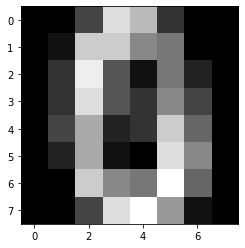

In [22]:
plt.imshow(ae2.predict([test_x[index]]).astype(np.uint).reshape((8,8)), cmap='gray')
plt.show()
# as you can see the decoded is not too similar to the input, but it learned the encodings well,
# which is its main task. If the outputs also matter you can try more sophesticated types of autoencoders